In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "../data/banksim.csv"  # Adjust based on actual path
df = pd.read_csv(file_path)

In [3]:
# Display basic dataset info
print("Dataset Information:")
df.info()
print("\nFirst 5 rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB

First 5 rows:
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007' 

In [4]:
# Convert categorical columns to appropriate types
df['customer'] = df['customer'].astype(str)
df['merchant'] = df['merchant'].astype(str)
df['category'] = df['category'].astype(str)

df['amount'] = df['amount'].astype(float)
df['fraud'] = df['fraud'].astype(int)

In [5]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64


In [6]:
# Basic statistics
print("\nTransaction Amount Statistics:")
print(df['amount'].describe())


Transaction Amount Statistics:
count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64


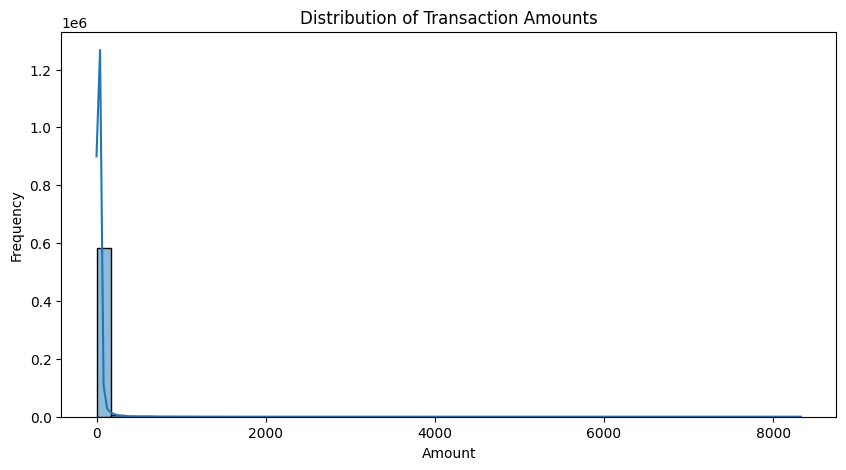

In [7]:
# Distribution of transaction amounts
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

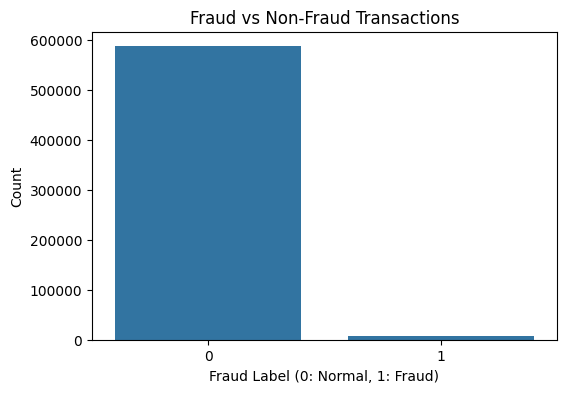

In [8]:
# Fraud vs Non-Fraud transaction counts
plt.figure(figsize=(6,4))
sns.countplot(x=df['fraud'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0: Normal, 1: Fraud)")
plt.ylabel("Count")
plt.show()

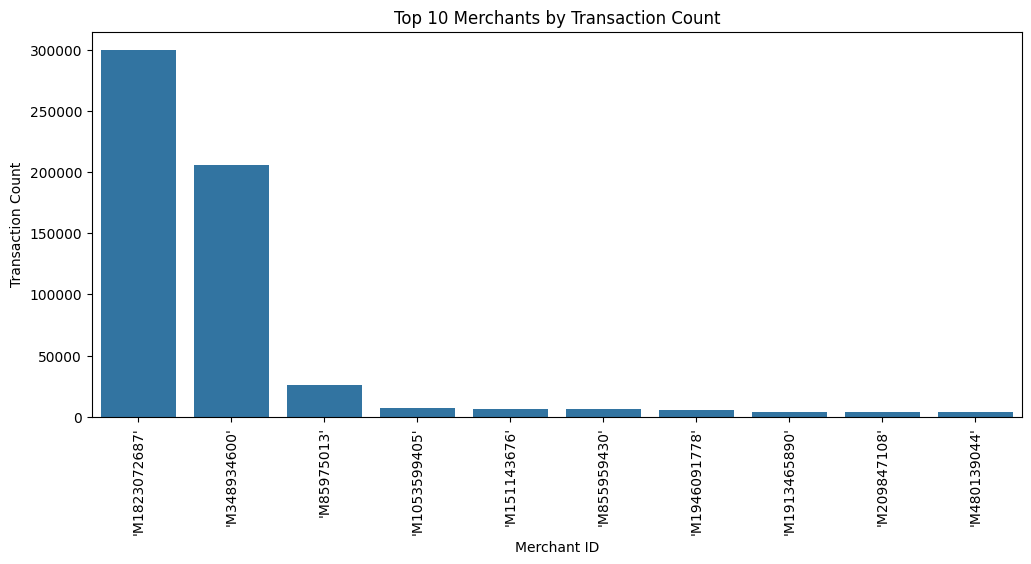

In [9]:
# Merchant transaction distribution
plt.figure(figsize=(12,5))
top_merchants = df['merchant'].value_counts().nlargest(10)
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.xticks(rotation=90)
plt.title("Top 10 Merchants by Transaction Count")
plt.xlabel("Merchant ID")
plt.ylabel("Transaction Count")
plt.show()

In [10]:
# Save cleaned dataset
df.to_csv("../data/cleaned_banksim.csv", index=False)

print("EDA completed. Cleaned dataset saved.")


EDA completed. Cleaned dataset saved.
